In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Year and quarter being analysed
y = 2022
q = 1

In [4]:
df = pd.read_csv(r'D:\pinkpanda\scm\Analytics - Anthony\Forecasts\Shopify + Amazon\data_AMAZON total orders until April 2022.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Amazon Order Id          22427 non-null  object 
 1   Merchant Order Id        0 non-null      float64
 2   Shipment ID              22427 non-null  object 
 3   Shipment Item Id         22427 non-null  object 
 4   Amazon Order Item Id     22427 non-null  int64  
 5   Merchant Order Item Id   0 non-null      float64
 6   Purchase Date            22427 non-null  object 
 7   Payments Date            22427 non-null  object 
 8   Shipment Date            22427 non-null  object 
 9   Reporting Date           22427 non-null  object 
 10  Buyer Email              22415 non-null  object 
 11  Buyer Name               0 non-null      float64
 12  Buyer Phone Number       0 non-null      float64
 13  Merchant SKU             22427 non-null  object 
 14  Title                 

In [5]:
df.tail(5)

,Amazon Order Id,Merchant Order Id,Shipment ID,Shipment Item Id,Amazon Order Item Id,Merchant Order Item Id,Purchase Date,Payments Date,Shipment Date,Reporting Date,...,bill-postal-code,bill-country,Item Promo Discount,Shipment Promo Discount,Carrier,Tracking Number,Estimated Arrival Date,FC,Fulfillment Channel,Sales Channel
22422,113-7974087-3449809,NaN,TW44L2PxQ,M9k2fXYHS,20155408311394,NaN,2022-03-31T20:08:50-07:00,2022-04-01T02:23:02-07:00,2022-04-01T01:31:38-07:00,2022-04-01T02:31:45-07:00,...,NaN,NaN,0.0,0.00,AMZN_US,TBA045441098904,2022-04-01T20:00:00-07:00,GYR1,AFN,Amazon.com
22423,114-2575275-9102635,NaN,Txnr9Kvfc,U4Tv0xPhY,20092195624738,NaN,2022-03-31T08:30:53-07:00,2022-04-01T01:30:48-07:00,2022-04-01T01:30:48-07:00,2022-04-01T04:30:57-07:00,...,NaN,NaN,0.0,0.00,AMZN_US,TBA045143652904,2022-04-02T20:00:00-07:00,LIT1,AFN,Amazon.com
22424,112-8254846-0088252,NaN,TxKM0Bvbc,DphhnX1LN,26776980694474,NaN,2022-03-31T11:09:11-07:00,2022-04-01T02:38:10-07:00,2022-04-01T01:30:14-07:00,2022-04-01T03:30:21-07:00,...,NaN,NaN,0.0,0.00,AMZN_US,TBA045195967104,2022-04-01T20:00:00-07:00,OAK4,AFN,Amazon.com
22425,114-9725798-3102645,NaN,ThsYZ452c,D5pfxhFLH,46842824608682,NaN,2022-03-25T11:57:07-07:00,2022-04-01T02:38:07-07:00,2022-04-01T01:24:22-07:00,2022-04-01T03:24:28-07:00,...,NaN,NaN,-2.0,0.00,AMZN_US,TBA045354402204,2022-04-02T20:00:00-07:00,TUS2,AFN,Amazon.com
22426,113-3912908-8235418,NaN,TxbvryPzQ,D2b6rCgjR,55735779957514,NaN,2022-03-31T20:47:13-07:00,2022-04-01T00:47:12-07:00,2022-04-01T00:47:15-07:00,2022-04-01T01:47:23-07:00,...,NaN,NaN,0.0,-1.49,AMZN_US,TBA523147679000,2022-04-01T07:00:00-07:00,SAZ1,AFN,Amazon.com


In [6]:
cols =[1,5,11,12,24,25,26,27,32,33,34,35,36,37,38,39,42,43,44,45,46,47]
df = df.drop(df.columns[cols], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Amazon Order Id          22427 non-null  object 
 1   Shipment ID              22427 non-null  object 
 2   Shipment Item Id         22427 non-null  object 
 3   Amazon Order Item Id     22427 non-null  int64  
 4   Purchase Date            22427 non-null  object 
 5   Payments Date            22427 non-null  object 
 6   Shipment Date            22427 non-null  object 
 7   Reporting Date           22427 non-null  object 
 8   Buyer Email              22415 non-null  object 
 9   Merchant SKU             22427 non-null  object 
 10  Title                    22427 non-null  object 
 11  Shipped Quantity         22427 non-null  int64  
 12  Currency                 22427 non-null  object 
 13  Item Price               22427 non-null  float64
 14  Item Tax              

In [7]:
df['Shipped Quantity'].describe()

count    22427.000000
mean         1.049806
std          0.292552
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: Shipped Quantity, dtype: float64

## Fixing dates

In [8]:
def date2date(col):
    col2 = col
    for i in range(col.shape[0]):
        col2[i]=col[i][0:10]
    return col2

In [9]:
df['Purchase Date'] = date2date(df['Purchase Date'])
df['Payments Date'] = date2date(df['Payments Date'])
df['Shipment Date'] = date2date(df['Shipment Date'])

In [10]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Payments Date'] = pd.to_datetime(df['Payments Date'])
df['Shipment Date'] = pd.to_datetime(df['Shipment Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Amazon Order Id          22427 non-null  object        
 1   Shipment ID              22427 non-null  object        
 2   Shipment Item Id         22427 non-null  object        
 3   Amazon Order Item Id     22427 non-null  int64         
 4   Purchase Date            22427 non-null  datetime64[ns]
 5   Payments Date            22427 non-null  datetime64[ns]
 6   Shipment Date            22427 non-null  datetime64[ns]
 7   Reporting Date           22427 non-null  object        
 8   Buyer Email              22415 non-null  object        
 9   Merchant SKU             22427 non-null  object        
 10  Title                    22427 non-null  object        
 11  Shipped Quantity         22427 non-null  int64         
 12  Currency                 22427 n

In [12]:
def monthNquarter(col):
    # Getting month, year and quarter
    day = col.dt.day
    month = col.dt.month
    year = col.dt.year
    Quarter = col.dt.quarter
    
    return month, year, Quarter, day
    
    

In [13]:
Month, Year, Quarter, day = monthNquarter(df['Purchase Date'])
df.insert(loc=6,column = 'Month',value = Month)
df.insert(loc=7,column = 'Year',value = Year)
df.insert(loc=8,column = 'Quarter', value = Quarter)

In [14]:
# Save the dataframe for later sku forecast
forecast_df = df

In [15]:
df.tail(50)

,Amazon Order Id,Shipment ID,Shipment Item Id,Amazon Order Item Id,Purchase Date,Payments Date,Month,Year,Quarter,Shipment Date,...,Shipping Tax,Gift Wrap Price,Gift Wrap Tax,Ship Service Level,Shipping City,Shipping State,Shipping Postal Code,Shipping Country Code,Item Promo Discount,Shipment Promo Discount
22377,111-6257472-9918636,TtMm15X6c,DlfghvmVR,40183523589842,2022-03-31,2022-04-01,3,2022,1,2022-04-01,...,0.0,0.0,0.0,Expedited,LOS ANGELES,CA,90012-4512,US,0.0,0.00
22378,111-3471106-5061816,TkjcPSKtc,DGFgdgvKN,62252792317530,2022-03-31,2022-04-01,3,2022,1,2022-04-01,...,0.0,0.0,0.0,Expedited,AUBURNDALE,MA,02466-2515,US,0.0,0.00
22379,113-3700146-1089025,THHzYxXmc,Dz4NmxZ9N,44945645728634,2022-03-31,2022-04-01,3,2022,1,2022-04-01,...,0.0,0.0,0.0,Expedited,NEW YORK,NY,10012-4164,US,0.0,0.00
22380,114-2187156-1041812,THYbQ3pcQ,DYCVTn1XN,69114714447418,2022-03-31,2022-04-01,3,2022,1,2022-04-01,...,0.0,0.0,0.0,Expedited,BOISE,ID,83702-6809,US,0.0,0.00
22381,111-5622808-2605049,TtcwCDncQ,DwQmzRVZR,43112252835218,2022-04-01,2022-04-01,4,2022,2,2022-04-01,...,0.0,0.0,0.0,Expedited,Denver,CO,80218,US,0.0,-0.33
22382,111-2026168-1346620,TxfLtynCQ,DsR4HSXpR,68291053341042,2022-03-31,2022-04-01,3,2022,1,2022-04-01,...,0.0,0.0,0.0,Expedited,AUSTIN,TX,78701-4808,US,0.0,0.00
22383,112-9594887-8455413,Tk64zKq1Q,DhGw7bNWR,11039411535290,2022-03-31,2022-04-01,3,2022,1,2022-04-01,...,0.0,0.0,0.0,Expedited,BLUE SPRINGS,MO,64014-5545,US,0.0,0.00
22384,113-6677574-6061037,TsVhCypHQ,DCcNz7V5R,34309068755706,2022-03-30,2022-04-01,3,2022,1,2022-04-01,...,0.0,0.0,0.0,Expedited,BOULDER,CO,80303-1310,US,0.0,0.00
22385,114-4167399-7673858,TqNzT8PJQ,D3NjL86HN,55971715485394,2022-03-31,2022-04-01,3,2022,1,2022-04-01,...,0.0,0.0,0.0,Expedited,NEW YORK,NY,10028-0448,US,0.0,0.00
22386,111-1061241-3576221,Tf1MNQpRQ,DK8QYbN8R,18316453807754,2022-04-01,2022-04-01,4,2022,2,2022-04-01,...,0.0,0.0,0.0,Expedited,LAKE ORION,MI,48359-1766,US,0.0,0.00


# Reports

## Sales by month and quarter

In [16]:
orders = df.groupby(['Amazon Order Id']).sum()
orders = orders[['Shipped Quantity','Item Price']]
orders.reset_index(level=0, inplace=True)
orders

,Amazon Order Id,Shipped Quantity,Item Price
0,111-0000101-4417808,1,19.95
1,111-0000819-5601042,1,19.95
2,111-0001820-4528228,1,29.95
3,111-0001906-7682663,1,29.95
4,111-0002922-9050626,1,29.95
...,...,...,...
20719,114-9987166-3562621,1,29.95
20720,114-9991171-1742644,1,19.95
20721,114-9997459-0035423,1,19.95
20722,114-9998244-5465029,1,29.95


In [17]:
orders.describe()

,Shipped Quantity,Item Price
count,20724.000000,20724.000000
mean,1.136074,25.885161
std,0.501037,12.591060
min,1.000000,0.000000
25%,1.000000,19.950000
50%,1.000000,19.950000
75%,1.000000,29.950000
max,20.000000,479.200000


In [18]:
orders.loc[orders['Shipped Quantity'] >15]

,Amazon Order Id,Shipped Quantity,Item Price
385,111-0739836-3889020,20,399.0
16688,114-2239257-3331465,16,479.2


In [19]:
df.loc[df['Amazon Order Id']=='111-0739836-3889020'][['Purchase Date','Merchant SKU','Shipped Quantity']]

,Purchase Date,Merchant SKU,Shipped Quantity
2434,2021-05-24,Treasure Chews (6 pack),4
2435,2021-05-24,Treasure Chews (6 pack),10
2436,2021-05-24,Treasure Chews (6 pack),6


In [20]:
# Here we get the total sales for orders for diff quantities shipped into a dictionary

total_op = {'1': orders.loc[orders['Shipped Quantity'] == 1]['Item Price'].sum(),
            '2': orders.loc[orders['Shipped Quantity'] == 2]['Item Price'].sum(),
            '3': orders.loc[orders['Shipped Quantity'] == 3]['Item Price'].sum(),
            '4': orders.loc[orders['Shipped Quantity'] == 4]['Item Price'].sum(),
            '5': orders.loc[orders['Shipped Quantity'] == 5]['Item Price'].sum(),
            '>5': orders.loc[orders['Shipped Quantity'] >5]['Item Price'].sum()}
total_op

{'1': 425392.62999999995,
 '2': 78404.29999999997,
 '3': 16613.100000000006,
 '4': 8011.399999999999,
 '5': 3641.75,
 '>5': 4380.9}

### Sales

In [21]:
sales = df.groupby(['Year','Month']).sum()
sales = sales[['Shipped Quantity','Item Price','Item Promo Discount','Shipment Promo Discount']]
sales.loc[2022]

,Shipped Quantity,Item Price,Item Promo Discount,Shipment Promo Discount
Month,,,,
1,2426,60238.7,-928.86,-255.87
2,2752,68442.4,-547.25,-385.71
3,2862,73046.9,-904.77,-422.63
4,2582,63870.9,-185.89,-406.66


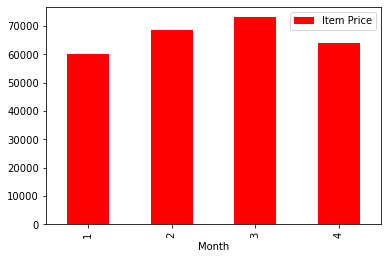

In [22]:
sales.loc[2022].plot(kind='bar',y='Item Price',color='red')
plt.show()

In [23]:
sales_q = df.groupby(['Year','Quarter']).sum()
sales_q = sales_q[['Shipped Quantity','Item Price','Item Promo Discount','Shipment Promo Discount']]
sales_q

Shipped Quantity  Item Price  Item Promo Discount  \
Year Quarter                                                      
2021 1                    1265    24957.53             -1218.47   
     2                    4136    82413.45             -1050.10   
     3                    3098    61825.35             -1194.38   
     4                    4423   101648.85             -2857.65   
2022 1                    8040   201728.00             -2380.88   
     2                    2582    63870.90              -185.89   

              Shipment Promo Discount  
Year Quarter                           
2021 1                        -101.80  
     2                        -339.99  
     3                        -210.18  
     4                        -504.99  
2022 1                       -1064.21  
     2                        -406.66

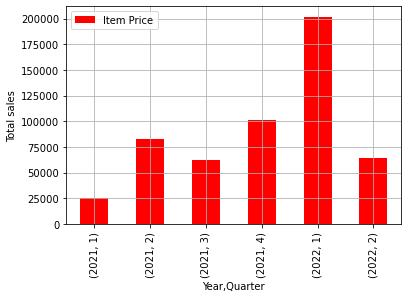

In [24]:
# Plot bar chart
sales_q.plot(kind='bar',y='Item Price',color='red').grid()

# Define labels
plt.ylabel("Total sales")

plt.show()

## Sales per SKU on a given month

In [126]:
SPSku = df.loc[(df['Year']==2021)&(df['Month']==10)]
SPSku.head()

,Amazon Order Id,Shipment ID,Shipment Item Id,Amazon Order Item Id,Purchase Date,Payments Date,Month,Year,Quarter,Shipment Date,...,Shipping Tax,Gift Wrap Price,Gift Wrap Tax,Ship Service Level,Shipping City,Shipping State,Shipping Postal Code,Shipping Country Code,Item Promo Discount,Shipment Promo Discount
7891,114-0842229-3685044,UHYKJkghT,DrXGdbBpN,20000000000000,2021-10-31,2021-11-01,10,2021,4,2021-10-31,...,0.0,0.0,0.0,Expedited,albany,CA,94706,US,0.00,0.0
7892,112-1464090-0497001,U4mmbhBYT,DsKfqHM9b,62800000000000,2021-10-31,2021-11-01,10,2021,4,2021-10-31,...,0.0,0.0,0.0,Expedited,Fairfield,OH,45014-3836,US,-5.99,0.0
7893,111-2147172-1031427,UqCcXWhmT,DtQYH4ZVR,65300000000000,2021-10-30,2021-10-31,10,2021,4,2021-10-31,...,0.0,0.0,0.0,Expedited,ELIOT,ME,03903-2148,US,-5.99,0.0
7894,114-2931993-6345820,Uv4DyDB9T,Dh9CmqBKR,46600000000000,2021-10-31,2021-10-31,10,2021,4,2021-10-31,...,0.0,0.0,0.0,Expedited,AUSTIN,TX,78758-7634,US,-5.99,0.0
7895,114-5157416-8384249,UsgSGZ6zT,DhRyNDm1R,20700000000000,2021-10-17,2021-10-31,10,2021,4,2021-10-31,...,0.0,0.0,0.0,Standard,RENO,NV,89523-2729,US,-2.00,0.0


In [129]:
SPSku = SPSku.groupby(['Merchant SKU']).sum()
SPSku = SPSku[['Shipped Quantity','Item Price']]
SPSku

,Shipped Quantity,Item Price
Merchant SKU,,
Astro Blasters (Pack of 6),658,13127.10
Astro Blasters 12 Pack-New,41,1227.95
Peachy Hearts (6 Pack),177,3531.15
Peachy Hearts 12 Pack-New,43,1287.85
Treasure Chews (12 Pack) - New,5,149.75
Treasure Chews (6 pack),445,8877.75
Variety Pack (12 Pack) - New,123,3683.85


## Grouping by customer

In [25]:
#First we delete all the $0 orders

index = df[df['Item Price']==0].index
df.drop(index,inplace = True)
df

,Amazon Order Id,Shipment ID,Shipment Item Id,Amazon Order Item Id,Purchase Date,Payments Date,Month,Year,Quarter,Shipment Date,...,Shipping Tax,Gift Wrap Price,Gift Wrap Tax,Ship Service Level,Shipping City,Shipping State,Shipping Postal Code,Shipping Country Code,Item Promo Discount,Shipment Promo Discount
0,111-0098154-1956210,DWRhl5X4p,DDss18TxR,69200000000000,2021-02-27,2021-02-28,2,2021,1,2021-02-28,...,0.0,0.0,0.0,Expedited,WASHINGTON,DC,20020-1044,US,-2.99,0.00
1,112-3804298-2181838,DfbR3rXHp,DCCP0dW1R,13900000000000,2021-02-26,2021-02-28,2,2021,1,2021-02-28,...,0.0,0.0,0.0,Expedited,MIAMI,FL,33132-2236,US,-2.99,0.00
2,114-2017927-6045847,DhF3GnXLp,DSC8rcTnR,16500000000000,2021-02-27,2021-02-28,2,2021,1,2021-02-28,...,0.0,0.0,0.0,Expedited,NEW YORK,NY,10011-1137,US,0.00,0.00
3,114-2017927-6045847,DhF3GnXLp,D0CTr6TnR,51700000000000,2021-02-27,2021-02-28,2,2021,1,2021-02-28,...,0.0,0.0,0.0,Expedited,NEW YORK,NY,10011-1137,US,0.00,0.00
4,112-7727511-7487414,DBqqZqXzp,DvQ3SrLZN,57900000000000,2021-02-28,2021-02-28,2,2021,1,2021-02-28,...,0.0,0.0,0.0,Expedited,MIAMI,FL,33156-7925,US,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22422,113-7974087-3449809,TW44L2PxQ,M9k2fXYHS,20155408311394,2022-03-31,2022-04-01,3,2022,1,2022-04-01,...,0.0,0.0,0.0,Expedited,MESA,AZ,85201-5313,US,0.00,0.00
22423,114-2575275-9102635,Txnr9Kvfc,U4Tv0xPhY,20092195624738,2022-03-31,2022-04-01,3,2022,1,2022-04-01,...,0.0,0.0,0.0,Expedited,Kansas city,Mo,64108,US,0.00,0.00
22424,112-8254846-0088252,TxKM0Bvbc,DphhnX1LN,26776980694474,2022-03-31,2022-04-01,3,2022,1,2022-04-01,...,0.0,0.0,0.0,Expedited,SAN FRANCISCO,CA,94127-1004,US,0.00,0.00
22425,114-9725798-3102645,ThsYZ452c,D5pfxhFLH,46842824608682,2022-03-25,2022-04-01,3,2022,1,2022-04-01,...,0.0,0.0,0.0,Standard,SAN DIEGO,CA,92129-2806,US,-2.00,0.00


In [26]:
customers = df.groupby(['Buyer Email']).sum()
customers = customers[['Shipped Quantity','Item Price','Item Promo Discount',]]
customers

,Shipped Quantity,Item Price,Item Promo Discount
Buyer Email,,,
002xckh80f0v1l6@marketplace.amazon.com,1,19.95,0.00
00cwx1slw3h6bsc@marketplace.amazon.com,2,39.90,0.00
00lszd4cjlcfgtz@marketplace.amazon.com,1,29.95,0.00
00nx8k7273gzq1f@marketplace.amazon.com,1,19.95,-2.99
00p0yw83mwdpfjr@marketplace.amazon.com,1,29.95,-1.50
...,...,...,...
zzv57mvnvn5hq9k@marketplace.amazon.com,1,29.95,0.00
zzvh2ys4tv047qj@marketplace.amazon.com,1,29.95,0.00
zzvm5jyx615t31k@marketplace.amazon.com,1,19.95,0.00


In [27]:
# Deleting first duplicated orders, allow us to count how many unique orders were made by every customer.
# This is necessary since in the original listing, orders would be duplicated if more than 1 sku was purchased in the same order
df_nd = df.drop_duplicates(subset=['Amazon Order Id'], keep='first')
orders_counts = df_nd.groupby(['Buyer Email']).count()
orders_counts

,Amazon Order Id,Shipment ID,Shipment Item Id,Amazon Order Item Id,Purchase Date,Payments Date,Month,Year,Quarter,Shipment Date,...,Shipping Tax,Gift Wrap Price,Gift Wrap Tax,Ship Service Level,Shipping City,Shipping State,Shipping Postal Code,Shipping Country Code,Item Promo Discount,Shipment Promo Discount
Buyer Email,,,,,,,,,,,,,,,,,,,,,
002xckh80f0v1l6@marketplace.amazon.com,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
00cwx1slw3h6bsc@marketplace.amazon.com,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
00lszd4cjlcfgtz@marketplace.amazon.com,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
00nx8k7273gzq1f@marketplace.amazon.com,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
00p0yw83mwdpfjr@marketplace.amazon.com,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzv57mvnvn5hq9k@marketplace.amazon.com,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
zzvh2ys4tv047qj@marketplace.amazon.com,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
zzvm5jyx615t31k@marketplace.amazon.com,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [28]:
customers['Count_orders_made'] = orders_counts['Amazon Order Id']
customers

,Shipped Quantity,Item Price,Item Promo Discount,Count_orders_made
Buyer Email,,,,
002xckh80f0v1l6@marketplace.amazon.com,1,19.95,0.00,1
00cwx1slw3h6bsc@marketplace.amazon.com,2,39.90,0.00,1
00lszd4cjlcfgtz@marketplace.amazon.com,1,29.95,0.00,1
00nx8k7273gzq1f@marketplace.amazon.com,1,19.95,-2.99,1
00p0yw83mwdpfjr@marketplace.amazon.com,1,29.95,-1.50,1
...,...,...,...,...
zzv57mvnvn5hq9k@marketplace.amazon.com,1,29.95,0.00,1
zzvh2ys4tv047qj@marketplace.amazon.com,1,29.95,0.00,1
zzvm5jyx615t31k@marketplace.amazon.com,1,19.95,0.00,1


In [29]:
# Reset the index so as to have a more clear access to emails.
customers.reset_index(level=0, inplace=True) 

In [30]:
customers

,Buyer Email,Shipped Quantity,Item Price,Item Promo Discount,Count_orders_made
0,002xckh80f0v1l6@marketplace.amazon.com,1,19.95,0.00,1
1,00cwx1slw3h6bsc@marketplace.amazon.com,2,39.90,0.00,1
2,00lszd4cjlcfgtz@marketplace.amazon.com,1,29.95,0.00,1
3,00nx8k7273gzq1f@marketplace.amazon.com,1,19.95,-2.99,1
4,00p0yw83mwdpfjr@marketplace.amazon.com,1,29.95,-1.50,1
...,...,...,...,...,...
12611,zzv57mvnvn5hq9k@marketplace.amazon.com,1,29.95,0.00,1
12612,zzvh2ys4tv047qj@marketplace.amazon.com,1,29.95,0.00,1
12613,zzvm5jyx615t31k@marketplace.amazon.com,1,19.95,0.00,1
12614,zzxd79wysf3gtkm@marketplace.amazon.com,1,19.95,0.00,1


In [31]:
recurring_customers = customers.loc[customers['Count_orders_made'] >1].shape[0]
recurring_customers

3363

In [32]:
Total_customers = len(df['Buyer Email'].unique())
Total_customers 

12616

### Retention rate calcs

In [33]:
# getting clients excluding last month ones. Assuming this is being prepared the month after the data has been generated.

month = datetime.date.today().month -1  # Customers will be fetched up until this month

if month ==12:
    year = datetime.date.today().year -1
else:
     year = datetime.date.today().year

# Deleting first duplicated orders, allow us to count how many unique orders were made by every customer.
# This is necessary since in the original listing, orders would be duplicated if more than 1 sku was purchased in the same order

df_nd = df.drop_duplicates(subset=['Buyer Email'], keep='first')
cus_an = df_nd[['Buyer Email','Purchase Date','Month','Year','Quarter']]
cus_an = cus_an.reset_index(drop=True)
cus_an

,Buyer Email,Purchase Date,Month,Year,Quarter
0,zwbd68lmz92s8p6@marketplace.amazon.com,2021-02-27,2,2021,1
1,gbz786j7yc3qcvl@marketplace.amazon.com,2021-02-26,2,2021,1
2,pvltmr7wrmj19zd@marketplace.amazon.com,2021-02-27,2,2021,1
3,6k65yklpld8dytw@marketplace.amazon.com,2021-02-28,2,2021,1
4,g7b59t9xxm34gwv@marketplace.amazon.com,2021-02-27,2,2021,1
...,...,...,...,...,...
12611,5331w00923j7j47@marketplace.amazon.com,2022-03-29,3,2022,1
12612,vq2ycbjlqz89fnx@marketplace.amazon.com,2022-03-31,3,2022,1
12613,678vcg4ww1xh7sl@marketplace.amazon.com,2022-03-31,3,2022,1
12614,s9vxvfh0dzzl2jt@marketplace.amazon.com,2022-03-31,3,2022,1


In [34]:
%%time
emails = list(cus_an['Buyer Email'])
ord_cnt = list()
itm_pric = list()

for i in range(len(emails)):
    ord_cnt.append(customers.loc[customers['Buyer Email'] == emails[i]]['Count_orders_made'])  
    itm_pric.append(customers.loc[customers['Buyer Email'] == emails[i]]['Item Price'])
len(ord_cnt)

Wall time: 30.1 s


12616

In [35]:
type(ord_cnt)

list

In [36]:
ord_cnt = np.array(ord_cnt)
itm_pric = np.array(itm_pric)
type(ord_cnt)
type(itm_pric)

numpy.ndarray

In [37]:
cus_an.insert(5,"Orders made",ord_cnt)
cus_an.insert(6,"Item Price", itm_pric)
cus_an

,Buyer Email,Purchase Date,Month,Year,Quarter,Orders made,Item Price
0,zwbd68lmz92s8p6@marketplace.amazon.com,2021-02-27,2,2021,1,1,19.95
1,gbz786j7yc3qcvl@marketplace.amazon.com,2021-02-26,2,2021,1,9,179.55
2,pvltmr7wrmj19zd@marketplace.amazon.com,2021-02-27,2,2021,1,1,39.90
3,6k65yklpld8dytw@marketplace.amazon.com,2021-02-28,2,2021,1,1,19.95
4,g7b59t9xxm34gwv@marketplace.amazon.com,2021-02-27,2,2021,1,1,19.95
...,...,...,...,...,...,...,...
12611,5331w00923j7j47@marketplace.amazon.com,2022-03-29,3,2022,1,1,29.95
12612,vq2ycbjlqz89fnx@marketplace.amazon.com,2022-03-31,3,2022,1,1,29.95
12613,678vcg4ww1xh7sl@marketplace.amazon.com,2022-03-31,3,2022,1,1,29.95
12614,s9vxvfh0dzzl2jt@marketplace.amazon.com,2022-03-31,3,2022,1,1,19.95


In [38]:
cus_an.loc[(cus_an['Month']== month) & (cus_an['Year']== year)]

,Buyer Email,Purchase Date,Month,Year,Quarter,Orders made,Item Price
11157,ql6lmz9qtr5c2jy@marketplace.amazon.com,2022-04-30,4,2022,2,4,99.80
11158,d6ckzsgwm74nq9c@marketplace.amazon.com,2022-04-30,4,2022,2,1,19.95
11159,j2rxdk7xgjf53rq@marketplace.amazon.com,2022-04-30,4,2022,2,1,19.95
11160,zz39ng0qp1rvh2n@marketplace.amazon.com,2022-04-28,4,2022,2,2,59.90
11161,jdygqqzhlg1xbn8@marketplace.amazon.com,2022-04-30,4,2022,2,2,59.90
...,...,...,...,...,...,...,...
12592,97gn8x1bf7w745y@marketplace.amazon.com,2022-04-01,4,2022,2,1,19.95
12595,2c83sllf817yh5k@marketplace.amazon.com,2022-04-01,4,2022,2,1,29.95
12597,t289wz2v39stbqd@marketplace.amazon.com,2022-04-01,4,2022,2,1,29.95
12599,9v4k3qc8wchhqwv@marketplace.amazon.com,2022-04-01,4,2022,2,1,19.95


In [39]:
# Total Customers used for retention rate
# Total customers - new customers from last month

TC = cus_an.loc[~((cus_an['Month']<3) & (cus_an['Month']==2021))].shape[0]
print("Total customers:",TC)

last_month_c = cus_an.loc[(cus_an['Month']== month) & (cus_an['Year']== year)]['Buyer Email'].count()
print("New customers from",month,":",last_month_c)

Retention_rate = (recurring_customers/TC)*100
print("Recurring customers:",recurring_customers)
print("Retention rate:",round(Retention_rate,2),"%")
print("\n")


TC_RR = TC-last_month_c
print("Adjusted total customers:", TC_RR)

Actual_Retention_rate = (recurring_customers/TC_RR)*100
print("Actual retention Rate:",round(Actual_Retention_rate,2),"%" )

Total customers: 12616
New customers from 4 : 1412
Recurring customers: 3363
Retention rate: 26.66 %


Adjusted total customers: 11204
Actual retention Rate: 30.02 %


In [40]:
RR_dict = {"Total customers": TC,
           "New customers March": last_month_c,
           "Recurring customers": recurring_customers,
           "Retention rate":round(Retention_rate,2),
           "Adjusted total customers": TC_RR,
           "Actual retention rate":round(Actual_Retention_rate,2) }

RR = pd.DataFrame.from_dict(RR_dict, orient='index', columns=['Values'])
RR

,Values
Total customers,12616.00
New customers March,1412.00
Recurring customers,3363.00
Retention rate,26.66
Adjusted total customers,11204.00
Actual retention rate,30.02


In [41]:
# Retention rate 2022

TC_2022 = cus_an.loc[cus_an['Year']== year]['Buyer Email'].count()
print("Total customers in 2022:",TC_2022)

rec_cus_2022 = cus_an.loc[(cus_an['Orders made']>1) & (cus_an['Year']==year)]['Buyer Email'].count()
print("Recurring customers in 2022:",rec_cus_2022)

Retention_rate = (rec_cus_2022/TC_2022)*100
TC_2022_RR = TC_2022-last_month_c
Actual_Retention_rate = (rec_cus_2022/TC_2022_RR)*100

print("\n")
print("Retention rate:",round(Retention_rate,2),"%")
print("Actual retention Rate:",round(Actual_Retention_rate,2),"%" )

Total customers in 2022: 5902
Recurring customers in 2022: 1223


Retention rate: 20.72 %
Actual retention Rate: 27.24 %


### New customers per quarter

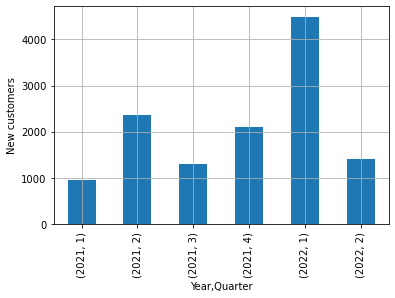

In [42]:
# New costumers per quarter

df_nd = df.drop_duplicates(subset=['Buyer Email'], keep='first')

cus_counts = df_nd.groupby(['Year','Quarter']).count() 

# Plot chart
cus_counts['Buyer Email'].plot(kind='bar').grid()

# Define labels
plt.ylabel("New customers")

plt.show()

In [43]:
cus_counts['Buyer Email']

Year  Quarter
2021  1           961
      2          2364
      3          1292
      4          2097
2022  1          4490
      2          1412
Name: Buyer Email, dtype: int64

In [44]:
sales_cus_Q = cus_counts[['Buyer Email']]
sales_cus_Q['Quarter sales'] = sales_q['Item Price']
sales_cus_Q

Buyer Email  Quarter sales
Year Quarter                            
2021 1                961       24957.53
     2               2364       82413.45
     3               1292       61825.35
     4               2097      101648.85
2022 1               4490      201728.00
     2               1412       63870.90

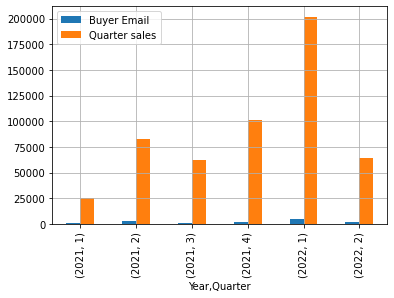

In [45]:
sales_cus_Q.plot(kind='bar').grid()

## Average order price vs number of orders

In [46]:
customers.describe()

,Shipped Quantity,Item Price,Item Promo Discount,Count_orders_made
count,12616.000000,12616.000000,12616.000000,12616.000000
mean,1.864299,42.520932,-0.704452,1.640774
std,2.506427,55.868962,3.023062,1.755665
min,1.000000,19.950000,-143.730000,1.000000
25%,1.000000,19.950000,0.000000,1.000000
50%,1.000000,29.950000,0.000000,1.000000
75%,2.000000,39.900000,0.000000,2.000000
max,98.000000,1955.100000,0.000000,33.000000


In [47]:
# Here we get the total sales for orders for diff quantities shipped into a dictionary
# For ALL the orders:
avg_op = {'1': customers.loc[customers['Count_orders_made'] == 1]['Item Price'].mean() /1,
            '2': customers.loc[customers['Count_orders_made'] == 2]['Item Price'].mean() /2,
            '3': customers.loc[customers['Count_orders_made'] == 3]['Item Price'].mean() /3,
            '4': customers.loc[customers['Count_orders_made'] == 4]['Item Price'].mean() /4,
            '5': customers.loc[customers['Count_orders_made'] == 5]['Item Price'].mean() /5,
            '>5': customers.loc[customers['Count_orders_made'] >5]['Item Price'].mean() /customers.loc[customers['Count_orders_made'] >5]['Count_orders_made'].mean() }
avg_op

{'1': 24.50705500918956,
 '2': 26.073779102782215,
 '3': 26.71074721009199,
 '4': 27.835638297872332,
 '5': 29.143144329896927,
 '>5': 27.36083007266625}

In [48]:
# For Q1 orders:
avg_op2 = {'1': cus_an.loc[(cus_an['Orders made'] == 1) & (cus_an['Year']== year)]['Item Price'].mean() /1,
            '2': cus_an.loc[(cus_an['Orders made'] == 2) & (cus_an['Year']== year)]['Item Price'].mean() /2,
            '3': cus_an.loc[(cus_an['Orders made'] == 3) & (cus_an['Year']== year)]['Item Price'].mean() /3,
            '4': cus_an.loc[(cus_an['Orders made'] == 4) & (cus_an['Year']== year)]['Item Price'].mean() /4,
            '5': cus_an.loc[(cus_an['Orders made'] == 5) & (cus_an['Year']== year)]['Item Price'].mean() /5,
            '>5': cus_an.loc[(cus_an['Orders made'] > 5) & (cus_an['Year']== year)]['Item Price'].mean() /customers.loc[customers['Count_orders_made'] >5]['Count_orders_made'].mean() }
avg_op2

{'1': 26.085039538360913,
 '2': 28.39775561097286,
 '3': 28.658091286306995,
 '4': 31.178230337078645,
 '5': 31.451555555555547,
 '>5': 23.725350572338208}

In [49]:
avg_op_df = pd.DataFrame.from_dict(avg_op2, orient='index', columns =['Average order price'])
avg_op_df

,Average order price
1,26.085040
2,28.397756
3,28.658091
4,31.178230
5,31.451556
>5,23.725351


In [50]:
total_cust_aop = [cus_an.loc[(cus_an['Orders made'] == 1) & (cus_an['Year']== year)]['Buyer Email'].count(),
                  cus_an.loc[(cus_an['Orders made'] == 2) & (cus_an['Year']== year)]['Buyer Email'].count(),
                  cus_an.loc[(cus_an['Orders made'] == 3) & (cus_an['Year']== year)]['Buyer Email'].count(),
                  cus_an.loc[(cus_an['Orders made'] == 4) & (cus_an['Year']== year)]['Buyer Email'].count(),
                  cus_an.loc[(cus_an['Orders made'] == 5) & (cus_an['Year']== year)]['Buyer Email'].count(),
                  cus_an.loc[(cus_an['Orders made'] > 5) & (cus_an['Year']== year)]['Buyer Email'].count()]
avg_op_df['Number of customers'] = total_cust_aop
avg_op_df

,Average order price,Number of customers
1,26.085040,4679
2,28.397756,802
3,28.658091,241
4,31.178230,89
5,31.451556,45
>5,23.725351,46


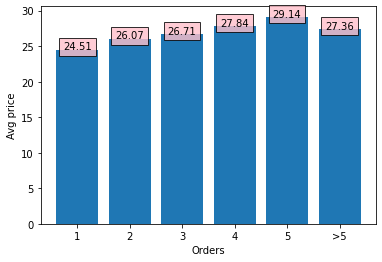

In [51]:
# Function to add value labels
def valuelabel(ord_freq,avg_price):
    for i in range(len(ord_freq)):
        plt.text(i,avg_price[i],round(avg_price[i],2), ha = 'center',
                 bbox = dict(facecolor = 'pink', alpha =0.8))


n_of_orders = list(avg_op.keys())
avg_price = list(avg_op.values())


# Plot bar chart
plt.bar(range(len(avg_op)), avg_price, tick_label=n_of_orders)

#call function
valuelabel(n_of_orders,avg_price)

# Define labels
plt.xlabel("Orders")
plt.ylabel("Avg price")
    
# show
plt.show()

## State's share in sales

In [52]:
# First we need to rework the column
df['Shipping State'] = df['Shipping State'].str.upper()

In [53]:
# Dictionary with state's postal code
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [54]:
def keys_upper(test_dict):
    res = dict()
    for key in test_dict.keys():
        if isinstance(test_dict[key], dict):
            res[key.upper()] = keys_upper(test_dict[key])
        else:
            res[key.upper()] = test_dict[key]
    return res

In [55]:
us_state_to_abbrev = keys_upper(us_state_to_abbrev)
df.replace(us_state_to_abbrev, inplace = True)
df.loc[df['Shipping State'] == 'ALABAMA']

,Amazon Order Id,Shipment ID,Shipment Item Id,Amazon Order Item Id,Purchase Date,Payments Date,Month,Year,Quarter,Shipment Date,...,Shipping Tax,Gift Wrap Price,Gift Wrap Tax,Ship Service Level,Shipping City,Shipping State,Shipping Postal Code,Shipping Country Code,Item Promo Discount,Shipment Promo Discount


In [56]:
# Here we choose the right year and quarter. Specified at the top
#y = 2022
#q = 1
df_yq = df.loc[(df['Quarter'] == q) & (df['Year'] == y)]

In [57]:
df_yq.sample(5)

,Amazon Order Id,Shipment ID,Shipment Item Id,Amazon Order Item Id,Purchase Date,Payments Date,Month,Year,Quarter,Shipment Date,...,Shipping Tax,Gift Wrap Price,Gift Wrap Tax,Ship Service Level,Shipping City,Shipping State,Shipping Postal Code,Shipping Country Code,Item Promo Discount,Shipment Promo Discount
13635,114-3930572-1636219,TqvgscdDb,DfwLyFVxR,36800000000000,2022-01-09,2022-01-11,1,2022,1,2022-01-11,...,0.0,0.0,0.0,Expedited,WEST HARTFORD,CT,06107-1406,US,-0.5,0.0
13936,111-0335964-8416238,TxHC5KQsN,TS95jJv3B,57100000000000,2022-01-06,2022-01-07,1,2022,1,2022-01-07,...,0.0,0.0,0.0,Expedited,GRAPEVINE,TX,76051-3047,US,0.0,0.0
13359,112-2280404-8265057,ThKLsGcJH,Djv7nKg0R,5600000000000,2022-01-15,2022-01-15,1,2022,1,2022-01-15,...,0.0,0.0,0.0,Expedited,BEAVERTON,OR,97006-4928,US,0.0,0.0
13282,111-5786511-6617867,TkdyCfBHH,U9b4hPGvR,40500000000000,2022-01-16,2022-01-17,1,2022,1,2022-01-17,...,0.0,0.0,0.0,Expedited,Hebron,IN,46341,US,0.0,0.0
14370,113-8926901-9140258,T4PMTljX2,DLbQp3PFN,20500000000000,2022-02-27,2022-02-28,2,2022,1,2022-02-28,...,0.0,0.0,0.0,Expedited,SAN DIEGO,CA,92116-3005,US,0.0,0.0


In [58]:
State = df_yq.groupby(['Shipping State']).sum()
State.reset_index(level=0, inplace=True) 
State

,Shipping State,Amazon Order Item Id,Month,Year,Quarter,Shipped Quantity,Item Price,Item Tax,Shipping Price,Shipping Tax,Gift Wrap Price,Gift Wrap Tax,Item Promo Discount,Shipment Promo Discount
0,AA,12100000000000,2,2022,1,1,29.95,1.88,0.00,0.00,0.00,0.00,-1.50,0.00
1,AE,134100000000000,8,8088,4,4,109.80,0.00,1.20,0.00,0.00,0.00,-3.00,-1.20
2,AK,725308952276028,41,48528,24,24,568.80,7.30,8.49,0.00,0.00,0.00,-15.50,-8.49
3,AL,1928369543017282,93,88968,44,44,1087.80,85.40,3.88,0.31,0.00,0.00,-17.00,0.00
4,AP,162100000000000,8,8088,4,4,109.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,AR,273300000000000,21,22242,11,12,299.40,27.67,0.00,0.00,0.00,0.00,-4.00,0.00
6,AZ,5635930989179516,313,311388,154,158,4032.10,32.60,30.11,0.05,0.00,0.00,-44.00,-25.62
7,CA,44074749013542312,2616,2604336,1288,1357,33682.15,0.00,217.09,0.00,0.00,0.00,-463.37,-169.78
8,CO,7272658643331886,446,432708,214,223,5798.85,322.64,27.17,0.00,0.00,0.00,-66.00,-27.17
9,CT,4264612044346782,237,232530,115,122,3103.90,194.34,0.25,0.00,0.00,0.00,-37.50,-0.25


In [59]:
# Remove useless columns
State = State[['Shipping State','Item Price']]

In [60]:
State

,Shipping State,Item Price
0,AA,29.95
1,AE,109.80
2,AK,568.80
3,AL,1087.80
4,AP,109.80
5,AR,299.40
6,AZ,4032.10
7,CA,33682.15
8,CO,5798.85
9,CT,3103.90


In [61]:
def percentage(col):
    per = col
    total = col.sum()
    for i in range(col.shape[0]):
        per[i] = (col[i]/total)*100
    return per

In [62]:
State['%'] = State['Item Price']
perc = percentage(State['%'])

In [63]:
State = State.sort_values(by=['%'], ascending = False)
State.head(5)

,Shipping State,Item Price,%
7,CA,33682.15,16.702598
41,NY,18702.30,9.274259
51,TX,16656.85,8.259944
12,FL,11307.45,5.607237
56,WA,9391.40,4.657089


###  Customer lifetime value
By measuring CLTV in relation to cost of customer acquisition (CAC), companies can measure how long it takes to recoup the investment required to earn a new customer — such as the cost of sales and marketing. In general, we want this ratio to be between 3:1 and 4:1

The formula used to get the index was the following:
1. Average Order Value = Total Sales/Total Orders
2. Purchase frequency = Total Orders/Total Customers
3. Customer Value = Average Order Value * Purchase frequency

In [64]:
# Total orders

Total_orders = customers['Count_orders_made'].sum()
Total_customers = customers['Buyer Email'].count()


# Average Order Value
avg_order_value = customers['Item Price'].sum() / Total_orders

# Purchase frequency
Purchase_freq = Total_orders/Total_customers

# Customer Value
Customer_value = avg_order_value*Purchase_freq
print("For Amazon, the CLTV of customers is: $",round(Customer_value,2))



# CLTV without last 30 days.


# Orders 
ordersrev = cus_an.loc[cus_an['Purchase Date']<'2022-03-01']['Orders made'].sum()

# Average Order Value
avg_order_value_rev = cus_an.loc[cus_an['Purchase Date']<'2022-03-01']['Item Price'].sum() / ordersrev

# Purchase frequency
purc_freq2 = ordersrev/TC_RR
print(TC_RR)

# Customer Value
Customer_value = avg_order_value_rev*purc_freq2
print("For Amazon, the CLTV of customers is: $",round(Customer_value,2))

For Amazon, the CLTV of customers is: $ 42.52
11204
For Amazon, the CLTV of customers is: $ 39.29


In [65]:
CLTV_Dict = {"Total sales": cus_an.loc[cus_an['Purchase Date']<'2022-03-01']['Item Price'].sum(),
             "Total orders": ordersrev,
             "Total customers": TC_RR,
             "Purchase Frequency":round(purc_freq2,2),
             "CLTV": round(Customer_value,2)}

CLTV = pd.DataFrame.from_dict(CLTV_Dict ,orient='index', columns= ['Values'])
CLTV


,Values
Total sales,440246.83
Total orders,17134.00
Total customers,11204.00
Purchase Frequency,1.53
CLTV,39.29


### Saving data into excel file.

In [66]:
# create a excel writer object
#with pd.ExcelWriter("D:\pinkpanda\scm\Analytics - Anthony\Quarterly investors report\Amazon_report.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
#    sales_cus_Q.to_excel(writer, sheet_name="Sales&Customers")
#    avg_op_df.to_excel(writer, sheet_name="Average Order price")
#    State.to_excel(writer, sheet_name="State's share")
#    RR.to_excel(writer, sheet_name="Retention rate")
#    CLTV.to_excel(writer, sheet_name="CLTV")
    
    

## Cohort analysis

In [67]:
df_c = forecast_df
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22403 entries, 0 to 22426
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Amazon Order Id          22403 non-null  object        
 1   Shipment ID              22403 non-null  object        
 2   Shipment Item Id         22403 non-null  object        
 3   Amazon Order Item Id     22403 non-null  int64         
 4   Purchase Date            22403 non-null  datetime64[ns]
 5   Payments Date            22403 non-null  datetime64[ns]
 6   Month                    22403 non-null  int64         
 7   Year                     22403 non-null  int64         
 8   Quarter                  22403 non-null  int64         
 9   Shipment Date            22403 non-null  datetime64[ns]
 10  Reporting Date           22403 non-null  object        
 11  Buyer Email              22403 non-null  object        
 12  Merchant SKU             22403 n

In [68]:
df_c = df_c.drop_duplicates(subset=['Amazon Order Id'])
#df_c.info()

In [69]:
# Here we keep only the customers that made more than 1 purchase
df_c = df_c.loc[df_c.duplicated(subset='Buyer Email', keep=False)]

# Verification that we only have rr customers
df_c['Buyer Email'].value_counts().min()

2

In [70]:
# Cantidad de clientes recurrentes:
len(df_c['Buyer Email'].unique())

3363

In [71]:
cols =[1,2,3,5,9,10,13,15,16,17,18,19,20,21,22,25,26,27,28]
df_c = df_c.drop(df_c.columns[cols], axis=1)
df_c

,Amazon Order Id,Purchase Date,Month,Year,Quarter,Buyer Email,Merchant SKU,Shipped Quantity,Shipping City,Shipping State
1,112-3804298-2181838,2021-02-26,2,2021,1,gbz786j7yc3qcvl@marketplace.amazon.com,Astro Blasters (Pack of 6),1,MIAMI,FL
9,112-2506644-7645055,2021-02-27,2,2021,1,5t5n34z2bqmp1bb@marketplace.amazon.com,Astro Blasters (Pack of 6),1,NORCROSS,GA
10,114-4438796-8770660,2021-02-27,2,2021,1,kyygvgbbh6z9lx5@marketplace.amazon.com,Astro Blasters (Pack of 6),1,LEESBURG,GA
16,112-6731857-9934655,2021-02-26,2,2021,1,8qvrl6870myk3pd@marketplace.amazon.com,Astro Blasters (Pack of 6),1,ROSLYN,NY
18,111-6887804-4018633,2021-02-26,2,2021,1,tqy067stx5k2qw1@marketplace.amazon.com,Astro Blasters (Pack of 6),1,NILES,MI
...,...,...,...,...,...,...,...,...,...,...
22411,113-2993270-8285028,2022-03-31,3,2022,1,r8gwfkmzw12kxdl@marketplace.amazon.com,Variety Pack (12 Pack) - New,1,ORANGEBURG,SC
22420,114-0069891-0055441,2022-03-18,3,2022,1,t6s188g1gp6wynf@marketplace.amazon.com,Treasure Chews (6 pack),1,Bogart,GA
22423,114-2575275-9102635,2022-03-31,3,2022,1,ckh74p5ln7s2m56@marketplace.amazon.com,Treasure Chews (6 pack),1,Kansas city,MO
22425,114-9725798-3102645,2022-03-25,3,2022,1,xsxwy1k8j2bgp1r@marketplace.amazon.com,Treasure Chews (6 pack),1,SAN DIEGO,CA


In [72]:
# RR per month:
rr_month = df_c.groupby(['Year','Month']).count()
cols =[0,1,2,3,4,6,7,8,9]
rr_month = rr_month.drop(['Amazon Order Id','Purchase Date','Quarter','Merchant SKU','Shipped Quantity','Shipping City','Shipping State'],axis=1)
rr_month


Buyer Email
Year Month             
2021 2               74
     3              337
     4              594
     5              725
     6              685
     7              619
     8              536
     9              639
     10             825
     11             749
     12             763
2022 1             1202
     2             1269
     3             1395
     4             1035

In [73]:
# Get how many unique rr customers made purchases each month

def get_uniq(month,year):
    num = len(df_c.loc[(df_c['Month']==month) & (df_c['Year']==year)]['Buyer Email'].unique())
    return num


years= [2021,2022]
uniq = list()

for i in range(len(years)):
    #print(years[i])
    for j in range(12):
        #print(j+1)
        if(get_uniq(j+1,years[i]) > 0):
            uniq.append(get_uniq(j+1,years[i]))
            #print(uniq)

In [74]:
rr_month['Unique Customers'] = uniq

In [75]:
rr_month

Buyer Email  Unique Customers
Year Month                               
2021 2               74                55
     3              337               242
     4              594               412
     5              725               505
     6              685               484
     7              619               444
     8              536               391
     9              639               447
     10             825               582
     11             749               551
     12             763               583
2022 1             1202               855
     2             1269               929
     3             1395              1012
     4             1035               744

In [76]:
# Dict with all the unique customers from each month
clients = {"2021-2": df_c.loc[(df_c['Year'] == 2021)&(df_c['Month'] == 2)]['Buyer Email'].unique(),
           "2021-3": df_c.loc[(df_c['Year'] == 2021)&(df_c['Month'] == 3)]['Buyer Email'].unique(),
           "2021-4": df_c.loc[(df_c['Year'] == 2021)&(df_c['Month'] == 4)]['Buyer Email'].unique(),
           "2021-5": df_c.loc[(df_c['Year'] == 2021)&(df_c['Month'] == 5)]['Buyer Email'].unique(),
           "2021-6": df_c.loc[(df_c['Year'] == 2021)&(df_c['Month'] == 6)]['Buyer Email'].unique(),
           "2021-7": df_c.loc[(df_c['Year'] == 2021)&(df_c['Month'] == 7)]['Buyer Email'].unique(),
           "2021-8": df_c.loc[(df_c['Year'] == 2021)&(df_c['Month'] == 8)]['Buyer Email'].unique(),
           "2021-9": df_c.loc[(df_c['Year'] == 2021)&(df_c['Month'] == 9)]['Buyer Email'].unique(),
           "2021-10": df_c.loc[(df_c['Year'] == 2021)&(df_c['Month'] == 10)]['Buyer Email'].unique(),
           "2021-11": df_c.loc[(df_c['Year'] == 2021)&(df_c['Month'] == 11)]['Buyer Email'].unique(),
           "2021-12": df_c.loc[(df_c['Year'] == 2021)&(df_c['Month'] == 12)]['Buyer Email'].unique(),
           "2022-1": df_c.loc[(df_c['Year'] == 2022)&(df_c['Month'] == 1)]['Buyer Email'].unique(),
           "2022-2": df_c.loc[(df_c['Year'] == 2022)&(df_c['Month'] == 2)]['Buyer Email'].unique(),
           "2022-3": df_c.loc[(df_c['Year'] == 2022)&(df_c['Month'] == 3)]['Buyer Email'].unique()}

In [77]:
# Client array with unique customers per month
clientarray = list()

for i in range(len(years)):
    for j in range(12):
        if(len(df_c.loc[(df_c['Year'] == years[i])&(df_c['Month'] == j+1)]['Buyer Email'].unique())>0):  
            clientarray.append(df_c.loc[(df_c['Year'] == years[i])&(df_c['Month'] == j+1)]['Buyer Email'].unique())


In [78]:
len(clientarray)

15

In [79]:
total = list()

for i in range(len(clientarray)):
    for j in range(len(clientarray)):
        total.append(len(set(clientarray[i]) & set(clientarray[j])))
        
#total = np.array_split(total,14)
total = np.array(total)
#total
total = total.reshape(len(clientarray),len(clientarray))
print(total.T)

[[  55   23   13   12    7   10    4    7    9    7    9    7    7    7
     4]
 [  23  242  100   62   46   29   20   26   27   17   17   22   20   23
    18]
 [  13  100  412  188  126   88   69   69   63   49   51   55   44   33
    32]
 [  12   62  188  505  228  126  107  101   88   83   64   66   53   50
    42]
 [   7   46  126  228  484  206  145  120  107   94   85   82   62   64
    37]
 [  10   29   88  126  206  444  181  139  103  105   79   79   67   73
    44]
 [   4   20   69  107  145  181  391  165  132  105   91   85   57   74
    45]
 [   7   26   69  101  120  139  165  447  186  142  120  117   85   93
    62]
 [   9   27   63   88  107  103  132  186  582  247  193  162  140  123
    88]
 [   7   17   49   83   94  105  105  142  247  551  224  185  146  135
    79]
 [   9   17   51   64   85   79   91  120  193  224  583  276  190  189
   119]
 [   7   22   55   66   82   79   85  117  162  185  276  855  373  295
   173]
 [   7   20   44   53   62   67   57   8

In [80]:
total =  np.tril(total, k=0)
print(total)

[[  55    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [  23  242    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [  13  100  412    0    0    0    0    0    0    0    0    0    0    0
     0]
 [  12   62  188  505    0    0    0    0    0    0    0    0    0    0
     0]
 [   7   46  126  228  484    0    0    0    0    0    0    0    0    0
     0]
 [  10   29   88  126  206  444    0    0    0    0    0    0    0    0
     0]
 [   4   20   69  107  145  181  391    0    0    0    0    0    0    0
     0]
 [   7   26   69  101  120  139  165  447    0    0    0    0    0    0
     0]
 [   9   27   63   88  107  103  132  186  582    0    0    0    0    0
     0]
 [   7   17   49   83   94  105  105  142  247  551    0    0    0    0
     0]
 [   9   17   51   64   85   79   91  120  193  224  583    0    0    0
     0]
 [   7   22   55   66   82   79   85  117  162  185  276  855    0    0
     0]
 [   7   20   44   53   62   67   57   8

In [81]:
rr_month['2021-2'] = total.T[0]
rr_month['2021-3'] = total.T[1]
rr_month['2021-4'] = total.T[2]
rr_month['2021-5'] = total.T[3]
rr_month['2021-6'] = total.T[4]
rr_month['2021-7'] = total.T[5]
rr_month['2021-8'] = total.T[6]
rr_month['2021-9'] = total.T[7]
rr_month['2021-10'] = total.T[8]
rr_month['2021-11'] = total.T[9]
rr_month['2021-12'] = total.T[10]
rr_month['2022-1'] = total.T[11]
rr_month['2022-2'] = total.T[12]
rr_month['2022-3'] = total.T[13]
rr_month['2022-4'] = total.T[14]

rr_month.rename(columns={'Buyer Email': 'Recurrent customers'}, inplace = True)

rr_month

Recurrent customers  Unique Customers  2021-2  2021-3  2021-4  \
Year Month                                                                  
2021 2                       74                55      55       0       0   
     3                      337               242      23     242       0   
     4                      594               412      13     100     412   
     5                      725               505      12      62     188   
     6                      685               484       7      46     126   
     7                      619               444      10      29      88   
     8                      536               391       4      20      69   
     9                      639               447       7      26      69   
     10                     825               582       9      27      63   
     11                     749               551       7      17      49   
     12                     763               583       9      17      51   
2022 1                     1202               855       7      22      55   
     2                     1269               929       7      20      44   
     3                     1395              1012       7      23      33   
     4                     1035               744       4      18      32   

            2021-5  2021-6  2021-7  2021-8  2021-9  2021-10  2021-11  2021-12  \
Year Month                                                                      
2021 2           0       0       0       0       0        0        0        0   
     3           0       0       0       0       0        0        0        0   
     4           0       0       0       0       0        0        0        0   
     5         505       0       0       0       0        0        0        0   
     6         228     484       0       0       0        0        0        0   
     7         126     206     444       0       0        0        0        0   
     8         107     145     181     391       0        0        0        0   
     9         101     120     139     165     447        0        0        0   
     10         88     107     103     132     186      582        0        0   
     11         83      94     105     105     142      247      551        0   
     12         64      85      79      91     120      193      224      583   
2022 1          66      82      79      85     117      162      185      276   
     2          53      62      67      57      85      140      146      190   
     3          50      64      73      74      93      123      135      189   
     4          42      37      44      45      62       88       79      119   

            2022-1  2022-2  2022-3  2022-4  
Year Month                                  
2021 2           0       0       0       0  
     3           0       0       0       0  
     4           0       0       0       0  
     5           0       0       0       0  
     6           0       0       0       0  
     7           0       0       0       0  
     8           0       0       0       0  
     9           0       0       0       0  
     10          0       0       0       0  
     11          0       0       0       0  
     12          0       0       0       0  
2022 1         855       0       0       0  
     2         373     929       0       0  
     3         295     452    1012       0  
     4         173     250     405     744

# Forecasting pre processing

### Amazon

In [82]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22403 entries, 0 to 22426
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Amazon Order Id          22403 non-null  object        
 1   Shipment ID              22403 non-null  object        
 2   Shipment Item Id         22403 non-null  object        
 3   Amazon Order Item Id     22403 non-null  int64         
 4   Purchase Date            22403 non-null  datetime64[ns]
 5   Payments Date            22403 non-null  datetime64[ns]
 6   Month                    22403 non-null  int64         
 7   Year                     22403 non-null  int64         
 8   Quarter                  22403 non-null  int64         
 9   Shipment Date            22403 non-null  datetime64[ns]
 10  Reporting Date           22403 non-null  object        
 11  Buyer Email              22403 non-null  object        
 12  Merchant SKU             22403 n

In [83]:
cols =[1,2,3,5,9,10,13,15,16,17,18,19,20,21,22,23,25,26,27,28]
forecast_df = forecast_df.drop(forecast_df.columns[cols], axis=1)
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22403 entries, 0 to 22426
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Amazon Order Id   22403 non-null  object        
 1   Purchase Date     22403 non-null  datetime64[ns]
 2   Month             22403 non-null  int64         
 3   Year              22403 non-null  int64         
 4   Quarter           22403 non-null  int64         
 5   Buyer Email       22403 non-null  object        
 6   Merchant SKU      22403 non-null  object        
 7   Shipped Quantity  22403 non-null  int64         
 8   Shipping State    22396 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.7+ MB


In [84]:
forecast_df['Merchant SKU'].value_counts()

Astro Blasters (Pack of 6)        8914
Treasure Chews (6 pack)           5650
Variety Pack (12 Pack) - New      3244
Astro Blasters 12 Pack-New        1812
Peachy Hearts (6 Pack)            1404
Treasure Chews (12 Pack) - New     799
Peachy Hearts 12 Pack-New          580
Name: Merchant SKU, dtype: int64

In [85]:
forecast_df.sort_values(by='Purchase Date')
forecast_df.head(5)

,Amazon Order Id,Purchase Date,Month,Year,Quarter,Buyer Email,Merchant SKU,Shipped Quantity,Shipping State
0,111-0098154-1956210,2021-02-27,2,2021,1,zwbd68lmz92s8p6@marketplace.amazon.com,Astro Blasters (Pack of 6),1,DC
1,112-3804298-2181838,2021-02-26,2,2021,1,gbz786j7yc3qcvl@marketplace.amazon.com,Astro Blasters (Pack of 6),1,FL
2,114-2017927-6045847,2021-02-27,2,2021,1,pvltmr7wrmj19zd@marketplace.amazon.com,Astro Blasters (Pack of 6),1,NY
3,114-2017927-6045847,2021-02-27,2,2021,1,pvltmr7wrmj19zd@marketplace.amazon.com,Treasure Chews (6 pack),1,NY
4,112-7727511-7487414,2021-02-28,2,2021,1,6k65yklpld8dytw@marketplace.amazon.com,Treasure Chews (6 pack),1,FL


In [86]:
# Create a feature to identy each month

Period = forecast_df['Year'].astype(str) + '-' + forecast_df['Month'].astype(str)
forecast_df.insert(2,'Period',Period)


In [87]:
res = forecast_df.groupby(['Merchant SKU','Period'],as_index = False).sum()#.pivot('Merchant SKU','Period')
res = res.drop(['Month','Year','Quarter'], axis=1)

res.sample(54)

,Merchant SKU,Period,Shipped Quantity
38,Peachy Hearts 12 Pack-New,2022-4,96
45,Treasure Chews (12 Pack) - New,2022-4,182
1,Astro Blasters (Pack of 6),2021-11,484
27,Peachy Hearts (6 Pack),2022-1,212
53,Treasure Chews (6 pack),2021-6,605
44,Treasure Chews (12 Pack) - New,2022-3,197
20,Astro Blasters 12 Pack-New,2022-2,385
34,Peachy Hearts 12 Pack-New,2021-9,8
2,Astro Blasters (Pack of 6),2021-12,523
11,Astro Blasters (Pack of 6),2022-1,695


In [88]:
res = res.pivot('Merchant SKU','Period').fillna(0)

In [89]:
res
#Saving to excel
#res.to_excel(r'D:\pinkpanda\scm\Analytics - Anthony\Forecasts\Shopify + Amazon\amazon-sku-month.xlsx')

Shipped Quantity                                \
Period                                  2021-10 2021-11 2021-12 2021-2 2021-3   
Merchant SKU                                                                    
Astro Blasters (Pack of 6)                658.0   484.0   523.0  181.0  548.0   
Astro Blasters 12 Pack-New                 41.0   123.0   207.0    0.0    0.0   
Peachy Hearts (6 Pack)                    177.0   140.0   111.0    0.0    0.0   
Peachy Hearts 12 Pack-New                  43.0    47.0    48.0    0.0    0.0   
Treasure Chews (12 Pack) - New              5.0    58.0   111.0    0.0    0.0   
Treasure Chews (6 pack)                   445.0   315.0   229.0  111.0  411.0   
Variety Pack (12 Pack) - New              123.0   189.0   346.0    0.0    0.0   

                                                                          \
Period                         2021-4 2021-5 2021-6 2021-7 2021-8 2021-9   
Merchant SKU                                                               
Astro Blasters (Pack of 6)      867.0  676.0  717.0  721.0  439.0  444.0   
Astro Blasters 12 Pack-New        0.0    0.0    0.0    0.0    0.0    4.0   
Peachy Hearts (6 Pack)            0.0    0.0    0.0    0.0    0.0   94.0   
Peachy Hearts 12 Pack-New         0.0    0.0    0.0    0.0    0.0    8.0   
Treasure Chews (12 Pack) - New    0.0    0.0    0.0    0.0    0.0    0.0   
Treasure Chews (6 pack)         511.0  755.0  605.0  415.0  464.0  504.0   
Variety Pack (12 Pack) - New      0.0    0.0    0.0    0.0    0.0    0.0   

                                                            
Period                         2022-1 2022-2 2022-3 2022-4  
Merchant SKU                                                
Astro Blasters (Pack of 6)      695.0  829.0  764.0  835.0  
Astro Blasters 12 Pack-New      348.0  385.0  425.0  409.0  
Peachy Hearts (6 Pack)          212.0  283.0  204.0  213.0  
Peachy Hearts 12 Pack-New       122.0  120.0  119.0   96.0  
Treasure Chews (12 Pack) - New  162.0  144.0  197.0  182.0  
Treasure Chews (6 pack)         335.0  286.0  299.0  298.0  
Variety Pack (12 Pack) - New    552.0  705.0  854.0  549.0

### Shopify

In [90]:
# Shopify sales report data, needs to be added Month and Year columns on excel

dfs = pd.read_csv(r'D:\pinkpanda\scm\Analytics - Anthony\Forecasts\Shopify + Amazon\data_shopify nov2020- April 2022.csv')
dfs.head()

,day,Month,Year,order_id,customer_id,variant_sku,shipping_region,orders,net_sales,total_sales,units_per_transaction
0,01-11-20,11,2020,2920000000000,4210000000000,VARIETY06,Florida,1.0,17.99,17.99,1
1,02-11-20,11,2020,2920000000000,4220000000000,VARIETY18,Nebraska,1.0,35.99,35.99,1
2,02-11-20,11,2020,2920000000000,4210000000000,VARIETY06,Kansas,1.0,17.99,17.99,1
3,02-11-20,11,2020,2920000000000,4220000000000,VARIETY06,Massachusetts,1.0,17.99,17.99,1
4,02-11-20,11,2020,2920000000000,4220000000000,VARIETY06,Virginia,1.0,17.99,17.99,1


In [91]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9252 entries, 0 to 9251
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    9252 non-null   object 
 1   Month                  9252 non-null   int64  
 2   Year                   9252 non-null   int64  
 3   order_id               9252 non-null   int64  
 4   customer_id            9252 non-null   int64  
 5   variant_sku            6196 non-null   object 
 6   shipping_region        9220 non-null   object 
 7   orders                 9252 non-null   float64
 8   net_sales              9252 non-null   float64
 9   total_sales            9252 non-null   float64
 10  units_per_transaction  9252 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 795.2+ KB


In [92]:
dfs['day'] = pd.to_datetime(dfs['day'])

In [93]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9252 entries, 0 to 9251
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   day                    9252 non-null   datetime64[ns]
 1   Month                  9252 non-null   int64         
 2   Year                   9252 non-null   int64         
 3   order_id               9252 non-null   int64         
 4   customer_id            9252 non-null   int64         
 5   variant_sku            6196 non-null   object        
 6   shipping_region        9220 non-null   object        
 7   orders                 9252 non-null   float64       
 8   net_sales              9252 non-null   float64       
 9   total_sales            9252 non-null   float64       
 10  units_per_transaction  9252 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 795.2+ KB


In [94]:
dfs.head(5)

,day,Month,Year,order_id,customer_id,variant_sku,shipping_region,orders,net_sales,total_sales,units_per_transaction
0,2020-01-11,11,2020,2920000000000,4210000000000,VARIETY06,Florida,1.0,17.99,17.99,1
1,2020-02-11,11,2020,2920000000000,4220000000000,VARIETY18,Nebraska,1.0,35.99,35.99,1
2,2020-02-11,11,2020,2920000000000,4210000000000,VARIETY06,Kansas,1.0,17.99,17.99,1
3,2020-02-11,11,2020,2920000000000,4220000000000,VARIETY06,Massachusetts,1.0,17.99,17.99,1
4,2020-02-11,11,2020,2920000000000,4220000000000,VARIETY06,Virginia,1.0,17.99,17.99,1


In [95]:
'''Month, Year, Quarter, day = monthNquarter(dfs['day'])
dfs.insert(loc=3,column = 'Month',value = Month)
dfs.insert(loc=2,column = 'Year',value = Year)
dfs.insert(loc=3,column = 'Quarter', value = Quarter)'''

"Month, Year, Quarter, day = monthNquarter(dfs['day'])\ndfs.insert(loc=3,column = 'Month',value = Month)\ndfs.insert(loc=2,column = 'Year',value = Year)\ndfs.insert(loc=3,column = 'Quarter', value = Quarter)"

In [96]:
# Create a feature to identy each month

Period = dfs['Year'].astype(str) + '-' + dfs['Month'].astype(str)
dfs.insert(1,'Period',Period)

In [97]:
dfs.loc[(dfs['Month'] == 9) & (dfs['Year'] == 2022)]

,day,Period,Month,Year,order_id,customer_id,variant_sku,shipping_region,orders,net_sales,total_sales,units_per_transaction


In [98]:
dfs.sample(10)

,day,Period,Month,Year,order_id,customer_id,variant_sku,shipping_region,orders,net_sales,total_sales,units_per_transaction
5338,2022-02-16,2022-2,2,2022,4680000000000,6070000000000,PHEARTS06,Colorado,1.00,19.99,19.99,1
6073,2022-02-03,2022-3,3,2022,4690000000000,6080000000000,NaN,Missouri,0.00,0.00,0.00,0
185,2020-10-12,2020-12,12,2020,3030000000000,4340000000000,VARIETY12,Utah,1.00,0.00,0.00,1
1838,2021-10-31,2021-10,10,2021,4540000000000,5920000000000,TCHEWS06,New Jersey,1.00,19.99,19.99,1
1820,2021-10-30,2021-10,10,2021,4540000000000,5920000000000,VARIETY12,Maryland,1.00,24.00,24.00,1
770,2021-03-23,2021-3,3,2021,3710000000000,5100000000000,VARIETY12,North Carolina,1.00,29.99,29.99,1
1635,2021-10-18,2021-10,10,2021,4240000000000,4410000000000,TCHEWS12,California,1.00,24.00,24.00,1
6534,2022-11-03,2022-3,3,2022,4710000000000,6100000000000,NaN,Missouri,0.00,0.00,0.00,0
8089,2022-06-04,2022-4,4,2022,4738455470298,6070054584538,VARIETY18,Virginia,34.99,1.00,34.99,1
3972,2022-01-22,2022-1,1,2022,4650000000000,5960000000000,NaN,Texas,0.00,0.00,0.00,0


In [99]:
cols =[0,2,3,4,5,7,8,9,10]
forecast_dfs = dfs.drop(dfs.columns[cols], axis=1)
forecast_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9252 entries, 0 to 9251
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Period                 9252 non-null   object
 1   variant_sku            6196 non-null   object
 2   units_per_transaction  9252 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 217.0+ KB


In [100]:
forecast_dfs.shape

(9252, 3)

In [101]:
forecast_dfs.isna().sum()

Period                      0
variant_sku              3056
units_per_transaction       0
dtype: int64

In [102]:
forecast_dfs = forecast_dfs.dropna()

outsku = ['HTY','HTP','ROUTEINS10','ASTBLAST24','TCHEWS24']

for i in range(len(outsku)):
    forecast_dfs = forecast_dfs[forecast_dfs.variant_sku != outsku[i]]



In [103]:
reshop = forecast_dfs.groupby(['variant_sku','Period'],as_index = False).sum()
reshop = reshop.pivot('variant_sku','Period').fillna(0)
reshop

units_per_transaction                                         \
Period                    2020-11 2020-12 2021-1 2021-10 2021-11 2021-12   
variant_sku                                                                
ASTBLAST06                   16.0     9.0    5.0    28.0    44.0    43.0   
ASTBLAST12                    5.0     4.0   10.0    18.0    18.0    21.0   
ASTBLAST18                    2.0    12.0    8.0    30.0    33.0    23.0   
PHEARTS06                     0.0     0.0    0.0    16.0    20.0    17.0   
PHEARTS12                     0.0     0.0    0.0     7.0    14.0     5.0   
PHEARTS18                     0.0     0.0    0.0    13.0    11.0    12.0   
TCHEWS06                      9.0     6.0    5.0    17.0    21.0    38.0   
TCHEWS12                      7.0     5.0    7.0     9.0    19.0    10.0   
TCHEWS18                      2.0     7.0   12.0     8.0    28.0    30.0   
VARIETY06                    50.0    46.0   33.0    13.0    29.0    37.0   
VARIETY12                    20.0   141.0   67.0   229.0   238.0   302.0   
VARIETY18                    28.0     0.0    0.0     0.0     0.0     0.0   

                                                                            \
Period      2021-2 2021-3 2021-4 2021-5 2021-6 2021-7 2021-8 2021-9 2022-1   
variant_sku                                                                  
ASTBLAST06     7.0   13.0    5.0    4.0    4.0    1.0    2.0    8.0   63.0   
ASTBLAST12     5.0    5.0    6.0   10.0    5.0    5.0   22.0    9.0   44.0   
ASTBLAST18    10.0   10.0   15.0   25.0   11.0    7.0    0.0   14.0   43.0   
PHEARTS06      0.0    0.0    0.0    0.0    0.0    0.0    0.0   35.0   28.0   
PHEARTS12      0.0    0.0    0.0    0.0    0.0    0.0    0.0   16.0   23.0   
PHEARTS18      0.0    0.0    0.0    0.0    0.0    0.0    0.0   18.0   15.0   
TCHEWS06       5.0    5.0    5.0    3.0    3.0    1.0    1.0    4.0   53.0   
TCHEWS12       3.0    9.0    6.0    4.0    8.0    7.0    1.0    3.0   35.0   
TCHEWS18       7.0    9.0    7.0   15.0   13.0    7.0    4.0    4.0   32.0   
VARIETY06     33.0   21.0   22.0   22.0    8.0    5.0    8.0   19.0   46.0   
VARIETY12     67.0   89.0   84.0   83.0   51.0   29.0   29.0   23.0  565.0   
VARIETY18      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   39.0   

                                  
Period      2022-2 2022-3 2022-4  
variant_sku                       
ASTBLAST06    27.0   38.0   25.0  
ASTBLAST12    15.0   28.0   22.0  
ASTBLAST18    40.0   52.0   39.0  
PHEARTS06     21.0   18.0   11.0  
PHEARTS12      9.0   14.0   13.0  
PHEARTS18     25.0   11.0   12.0  
TCHEWS06      18.0   23.0   15.0  
TCHEWS12      12.0   24.0   19.0  
TCHEWS18      26.0   40.0   52.0  
VARIETY06     35.0    3.0    0.0  
VARIETY12    326.0  430.0  254.0  
VARIETY18    232.0  301.0  311.0

In [104]:
# Saving to excel
#reshop.to_excel(r'D:\pinkpanda\scm\Analytics - Anthony\Forecasts\Shopify + Amazon\Shopify-sku-month.xlsx')

## Shopify data analysis

In [105]:
sd = pd.read_csv(r'D:\pinkpanda\scm\Analytics - Anthony\Quarterly investors report\downloads\Q1 2022\For shopify script\Orders_customers_dataALL.csv')

In [106]:
sd.head()

,month,order_id,customer_id,customer_type,total_sales,orders,average_order_value,units_per_transaction,Month,Quarter,Year
0,2021-01,3143763460247,4482702049431,First-time,29.99,1,29.99,1,1,Q1,2021
1,2021-01,3122993987735,4225979285655,Returning,62.99,1,62.99,2,1,Q1,2021
2,2021-01,3112270332055,4445284204695,First-time,27.00,1,27.00,1,1,Q1,2021
3,2021-01,3146087137431,4485430182039,First-time,21.00,1,21.00,1,1,Q1,2021
4,2021-01,3155882868887,4497276043415,First-time,35.20,1,35.20,1,1,Q1,2021


In [107]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 0 to 4248
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  4249 non-null   object 
 1   order_id               4249 non-null   int64  
 2   customer_id            4249 non-null   int64  
 3   customer_type          4247 non-null   object 
 4   total_sales            4249 non-null   float64
 5   orders                 4249 non-null   int64  
 6   average_order_value    4249 non-null   float64
 7   units_per_transaction  4249 non-null   int64  
 8   Month                  4249 non-null   int64  
 9   Quarter                4249 non-null   object 
 10  Year                   4249 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 365.3+ KB


In [108]:
sd = sd.loc[sd['total_sales']>0]
sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4248
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  4040 non-null   object 
 1   order_id               4040 non-null   int64  
 2   customer_id            4040 non-null   int64  
 3   customer_type          4039 non-null   object 
 4   total_sales            4040 non-null   float64
 5   orders                 4040 non-null   int64  
 6   average_order_value    4040 non-null   float64
 7   units_per_transaction  4040 non-null   int64  
 8   Month                  4040 non-null   int64  
 9   Quarter                4040 non-null   object 
 10  Year                   4040 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 378.8+ KB


In [109]:
# Here we select the subset corresponding to the last 365 days
# Month and year of the last month to discount the new customers for RR.
last_month = sd['Month'].to_numpy()[-1]
last_year = sd['Year'].to_numpy()[-1]


sd = sd.loc[~((sd['Month'] <last_month) & (sd['Year'] == (last_year -1)))]
sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3882 entries, 183 to 4248
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  3882 non-null   object 
 1   order_id               3882 non-null   int64  
 2   customer_id            3882 non-null   int64  
 3   customer_type          3881 non-null   object 
 4   total_sales            3882 non-null   float64
 5   orders                 3882 non-null   int64  
 6   average_order_value    3882 non-null   float64
 7   units_per_transaction  3882 non-null   int64  
 8   Month                  3882 non-null   int64  
 9   Quarter                3882 non-null   object 
 10  Year                   3882 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 363.9+ KB


In [110]:
sd.head()

,month,order_id,customer_id,customer_type,total_sales,orders,average_order_value,units_per_transaction,Month,Quarter,Year
183,2021-03,3707467137175,5069875937431,Returning,29.99,1,29.99,1,3,Q1,2021
184,2021-03,3675981774999,5069861290135,First-time,26.40,1,26.40,1,3,Q1,2021
185,2021-03,3714850717847,5074641813655,Returning,29.99,1,29.99,1,3,Q1,2021
186,2021-03,3705352913047,5098780917911,First-time,52.79,1,52.79,2,3,Q1,2021
187,2021-03,3671142662295,5064960704663,First-time,19.99,1,19.99,1,3,Q1,2021


In [111]:
sd.tail()

,month,order_id,customer_id,customer_type,total_sales,orders,average_order_value,units_per_transaction,Month,Quarter,Year
4244,2022-03,4724529234138,6114126364890,First-time,36.00,1,36.00,1,3,Q1,2022
4245,2022-03,4727056138458,6116931371226,First-time,34.99,1,34.99,1,3,Q1,2022
4246,2022-03,4698339213530,6089146335450,First-time,24.99,1,24.99,1,3,Q1,2022
4247,2022-03,4720376217818,6109618798810,First-time,39.99,1,39.99,1,3,Q1,2022
4248,2022-03,4719881584858,6109131833562,First-time,34.99,1,34.99,1,3,Q1,2022


In [112]:
total_customers = sd.drop_duplicates(subset=['customer_id'])['customer_id'].count()
total_customers

3209

In [113]:
FTC = sd.drop_duplicates(subset=['order_id'])
FTC = FTC['customer_type'].value_counts()[0] 
FTC

3134

In [114]:
# Cargar data RR

In [115]:
# New customers in March
sdd = sd.loc[((sd['Month'] == last_month) & (sd['Year'] == 2022))]
sdd['customer_type'].value_counts()
FTC_March = sdd['customer_type'].value_counts()[0]
FTC_March

715